In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
reduced = pd.read_csv("data/final.csv")
reduced = reduced.drop(columns="Unnamed: 0")

In [3]:
reduced.head()

,scores,predscores,tmhalfsc,opphalfsc,patt,ypa,comppct,ratt,ypr,int_pct,sack_pct,sack_yd_pct,fum_pct
0,16.0,24.75,6.0,13.0,19.0,6.736842,0.578947,8.0,1.500000,0.105263,0.095238,-0.523810,0.000000
1,38.0,24.75,10.0,7.0,25.0,7.000000,0.640000,13.0,3.384615,0.000000,0.038462,-0.230769,0.025641
2,20.0,17.75,13.0,10.0,11.0,4.272727,0.636364,15.0,3.466667,0.000000,0.153846,-0.769231,0.071429
3,7.0,24.75,0.0,10.0,15.0,5.466667,0.666667,10.0,2.200000,0.000000,0.000000,0.000000,0.040000
4,14.0,25.50,7.0,6.0,21.0,8.333333,0.714286,15.0,2.733333,0.047619,0.045455,-0.318182,0.027027


In [4]:
jag_predicted = (37 / 2) - (5.5 / 2)
titan_predicted = (37 / 2) + (5.5 / 2)
jag_half_sc = 2
titan_half_sc = 16
jag_patt = 17
titan_patt = 16
jag_ypa = 3.8
titan_ypa = 6.0
jag_comppct = 12 / 17
titan_comppct = 12 / 16
jag_ratt = 15
titan_ratt = 11
jag_ypr = 1.7
titan_ypr = 12.8
jag_int_pct = 0
titan_int_pct = 1 / 17

In [5]:
predscores = [titan_predicted, jag_predicted]
tmhalfsc = [titan_half_sc, jag_half_sc]
opphalfsc = [jag_half_sc, titan_half_sc]
patt = [titan_patt, jag_patt]
ypa = [titan_ypa, jag_ypa]
comppct = [titan_comppct, jag_comppct]
ratt = [titan_ratt, jag_ratt]
ypr = [titan_ypr, jag_ypr]
int_pct = [titan_int_pct, jag_int_pct]

In [6]:
thursday_night = np.array([predscores, tmhalfsc, opphalfsc, patt, 
                           ypa, comppct, ratt, ypr, int_pct]).T
final_score = [30, 9]
pre_game_pred = [int(x) for x in predscores]

In [7]:
X = reduced.drop(columns=["scores", "int_pct", "sack_pct", 
                          "sack_yd_pct", "fum_pct"])
y = reduced.scores

In [8]:
bag = BaggingRegressor(LinearRegression(), n_estimators=59, max_samples=0.92,
                             bootstrap=True, n_jobs=-1)

In [9]:
bag.fit(X, y)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.92, n_estimators=59, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [10]:
pred = bag.predict(thursday_night)

In [11]:
pred = [int(x) for x in pred]

In [12]:
results = pd.DataFrame([pre_game_pred, pred, final_score], 
                       columns=["Titans", "Jaguars"], 
                       index=["Pre-Game Prediction", "Half-Time Prediction", 
                              "Actual"])

In [13]:
results

,Titans,Jaguars
Pre-Game Prediction,21,15
Half-Time Prediction,26,9
Actual,30,9


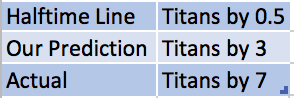

In [14]:
Image(filename="images/titans_jags.png")